## Revenue Generation through Web Browsing Statistics

Problem Statement: Predicting whether the visitor to the page will buy something.

###Data Set Information:

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.


Attribute Information:

The dataset consists of 18 attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

https://support.google.com/analytics/answer/1009409?hl=en#:~:text=Bounce%20rate%20is%20single%2Dpage,request%20to%20the%20Analytics%20server. (information on bounce rate, basically means that if customer goes to one single webpage, and leaves immediately after without going to another webpage, it's considered as a bounce. Bounce Rate for a page is based only on sessions that start with that page.)

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

https://support.google.com/analytics/answer/2525491?hl=en (information on exit rate, the exit rate of a page refers to the number of times where the customer exits from the page, divided by the number of times the page was accessed)

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
https://support.google.com/analytics/answer/2695658?hl=en (information on page value) 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# EDA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import math
import calendar
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/PaleCascade-1/Repository_IOD/main/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
df["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [ ]:
df.iloc[0]

Administrative                             0
Administrative_Duration                  0.0
Informational                              0
Informational_Duration                   0.0
ProductRelated                             1
ProductRelated_Duration                  0.0
BounceRates                              0.2
ExitRates                                0.2
PageValues                               0.0
SpecialDay                               0.0
Month                                    Feb
OperatingSystems                           1
Browser                                    1
Region                                     1
TrafficType                                1
VisitorType                Returning_Visitor
Weekend                                False
Revenue                                False
Name: 0, dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


<Axes: >

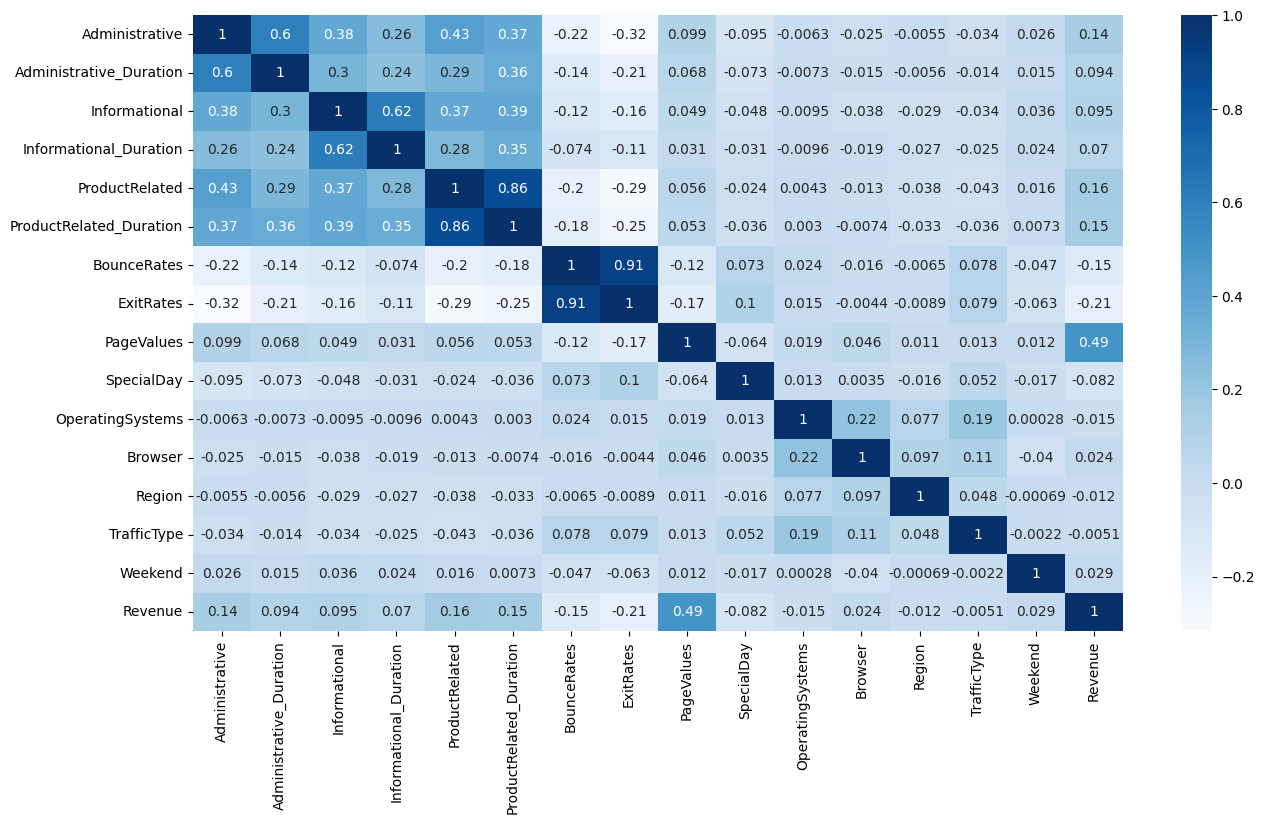

In [ ]:
## correlation heatmap represent correlation between different variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
df.drop(df[df["VisitorType"]=="Other"].index,inplace=True)

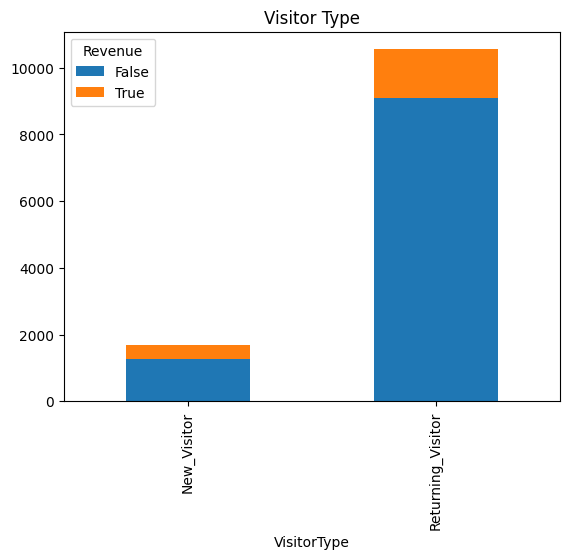

In [ ]:
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind='bar', stacked=True)
plt.title("Visitor Type")
plt.show()

Revenue,False,True
VisitorType,,
New_Visitor,75.089,24.911
Returning_Visitor,86.068,13.932


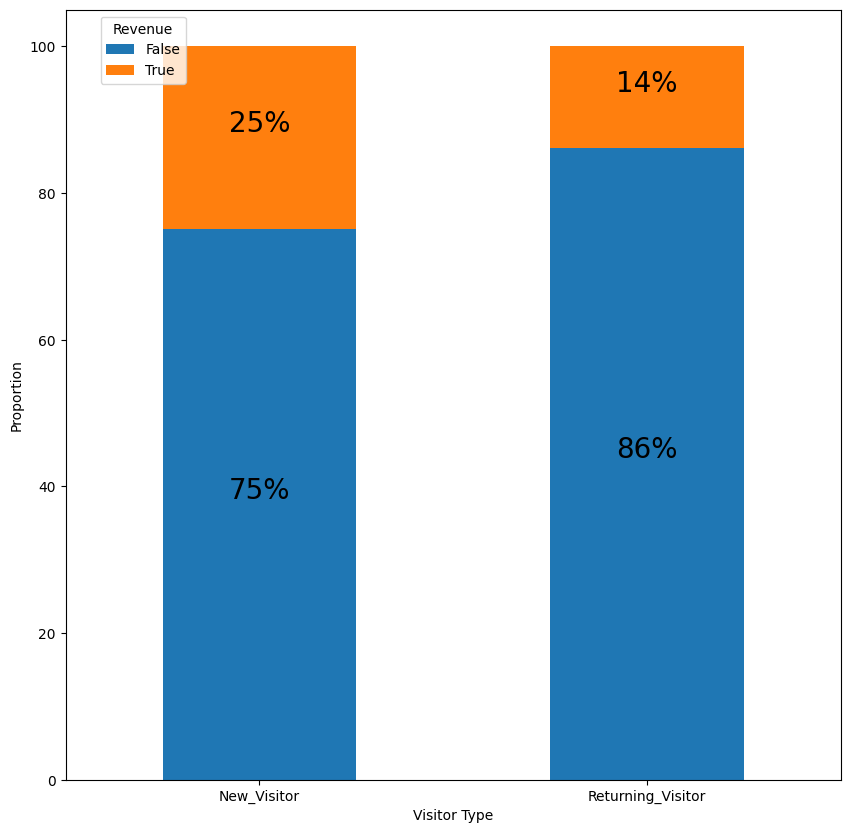

In [ ]:
ax= pd.crosstab(df['VisitorType'], df['Revenue'],normalize="index").mul(100).round(3)
ax_1 = ax.plot.bar(figsize=(10,10), stacked=True, rot=0)
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Revenue")

plt.xlabel('Visitor Type')
plt.ylabel('Proportion')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width()/2 , 
              rec.get_y() + height/2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom',fontsize=20)
    
plt.show()

Returning visitors tend to have a lower proportion of buying stuff. 
New visitors form a lower proportion on the site to buy stuff. Perhaps good to implement some sort of loyalty program to entice people who buy stuff to come back (since we see that returning visitors tend to have a lower propensity to buy)

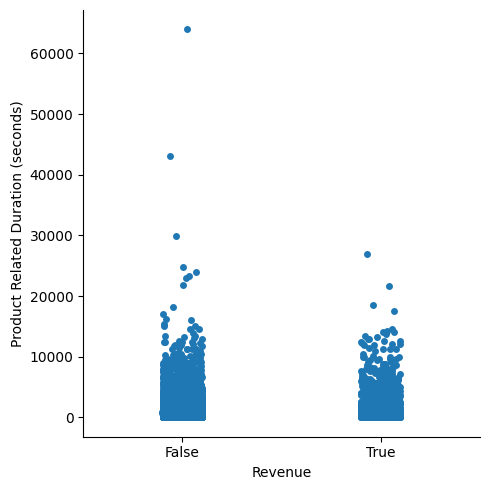

In [ ]:
##plots for revenue against product duration, or exit/bounce rates.
sns.catplot(data=df,x="Revenue",y="ProductRelated_Duration")
plt.ylabel("Product Related Duration (seconds)")
plt.show()

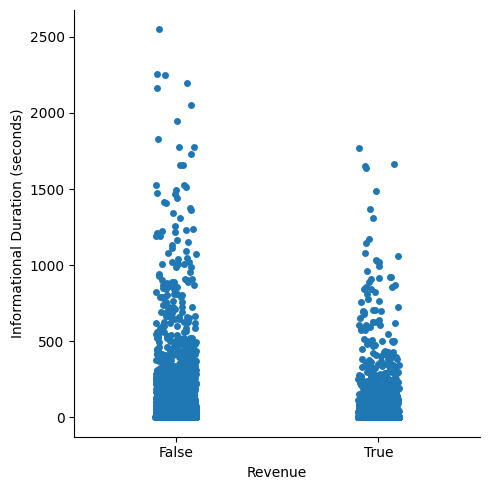

In [ ]:
sns.catplot(data=df,x="Revenue",y="Informational_Duration")
plt.ylabel("Informational Duration (seconds)")
plt.show()

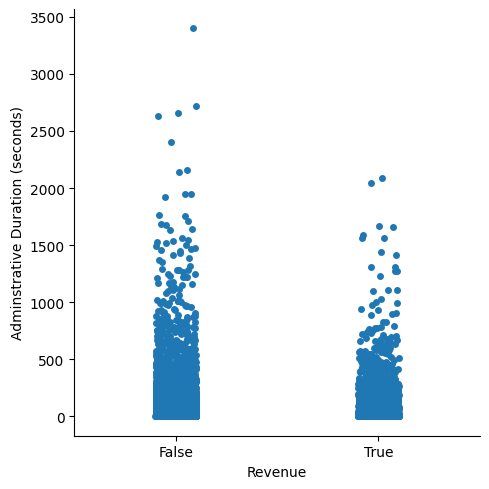

In [ ]:
sns.catplot(data=df,x="Revenue",y="Administrative_Duration")
plt.ylabel("Adminstrative Duration (seconds)")
plt.show()

The three duration charts show that there's no real relationship between the durations on the various sites and the revenue, since the data is concentrated towards the lower durations for both the revenue generating and non revenue generating labels.

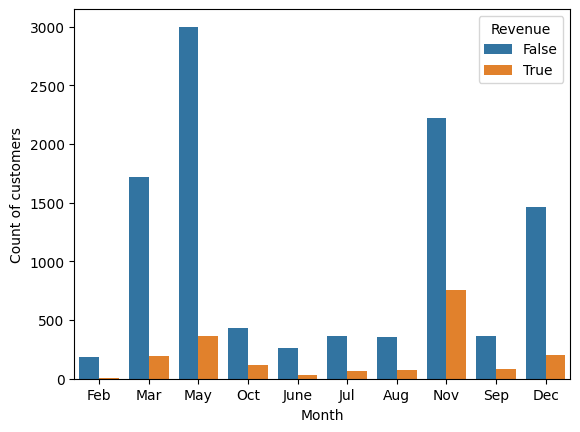

In [ ]:
sns.countplot(data=df,x="Month",hue="Revenue")
plt.ylabel("Count of customers")
plt.show()

The largest number of visitors to the site is in the months March, May and November. For November, the amount of purchases from customers were the highest. Possible to look into the different products bought in Nov to see on whether revenue can be maximised in this regard.

In May, the visitors to the site appear to not want to buy something on the site. To look into the reasons why in May, so many people do not want to buy something. Possible recommendation: have flash sales in May to try to entice people to buy something.

In [ ]:
##Converting Visitor_Type into numbers

for i in range(len(df)):
    if df.iloc[i][-3]=="Returning_Visitor":
        df.replace(df.iloc[i][-3],1,inplace=True)
    if df.iloc[i][-3]=="New_Visitor":
        df.replace(df.iloc[i][-3],0,inplace=True)


In [ ]:
##Converting Revenue and Weekend columns into numbers
df[["Weekend","Revenue"]]=df[["Weekend","Revenue"]].astype(int)

In [ ]:
##Converting month name into integers
dict=({month: index for index, month in enumerate(calendar.month_abbr) if month})
dict["June"]=6
df["Month"].replace(dict,inplace=True)

In [ ]:
df["Month"].value_counts()

5     3364
11    2976
3     1907
12    1665
10     549
9      448
8      433
7      432
6      287
2      184
Name: Month, dtype: int64

In [ ]:
df["Revenue"].value_counts()

0    10353
1     1892
Name: Revenue, dtype: int64

In [ ]:
df.shape

(12245, 18)

In [ ]:
df["VisitorType"].value_counts()

1    10551
0     1694
Name: VisitorType, dtype: int64

# Modelling based on all features

Utilising various models with all numerical features 

## Logistic Regression

In [ ]:
#Splitting data, with stratification due to imbalanced data and Setting target variables and predictor variables
## Use this data set for all models, to have a good comparison across all models.
y=df["Revenue"]
X=df.drop("Revenue",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3,stratify=y)

In [ ]:
##Scaling of Data
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
#Utilising SMOTE
sm_sample=SMOTE(random_state=1)
X_train_SMOTE,y_train_SMOTE=sm_sample.fit_resample(X_train_scaled,y_train)

In [ ]:
##Logistic Regression model based on all features
lrmodel=LogisticRegression(max_iter=10000)
lrmodel.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
lrmodel.score(X_train_scaled,y_train)

0.8818107572045268

In [ ]:
lrmodel.score(X_test_scaled,y_test)

0.882144801306478

In [ ]:
lrmodel.coef_

array([[ 0.04964028, -0.03890827,  0.0190517 ,  0.02647233,  0.13945359,
         0.11209388, -0.25013984, -0.70352224,  1.41824668, -0.10147591,
         0.30128019, -0.06966641,  0.05438719, -0.03584254,  0.02724666,
        -0.10207915,  0.07882567]])

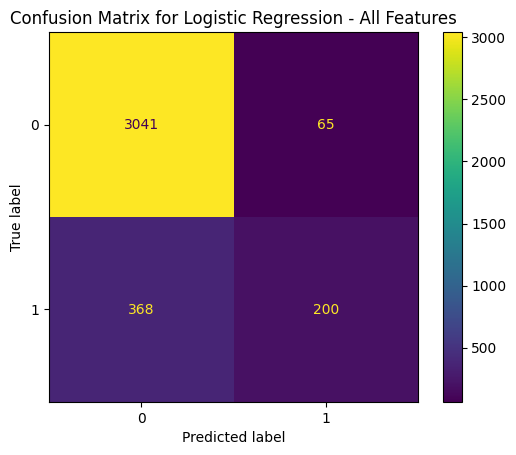

In [ ]:
##Confusion Matrix for Logistic Regression - All features
y_pred=lrmodel.predict(X_test_scaled)
fig = ConfusionMatrixDisplay.from_predictions(y_test,y_pred).figure_
plt.title("Confusion Matrix for Logistic Regression - All Features")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3106
           1       0.75      0.35      0.48       568

    accuracy                           0.88      3674
   macro avg       0.82      0.67      0.71      3674
weighted avg       0.87      0.88      0.86      3674



Model appears to be weak as its recall is low.

## SVM - Support Vector Machine

In [ ]:
##SVM model with all features
##Ran GridsearchCV to find that C=5 and kernel=rbf gave the best score, the code ran for 1hr 42 mins, so don't recommend running again. This has been optimised.
svmodel=svm.SVC(C=5,kernel="rbf",probability=True)
svmodel.fit(X_train_scaled,y_train)

SVC(C=5, probability=True)

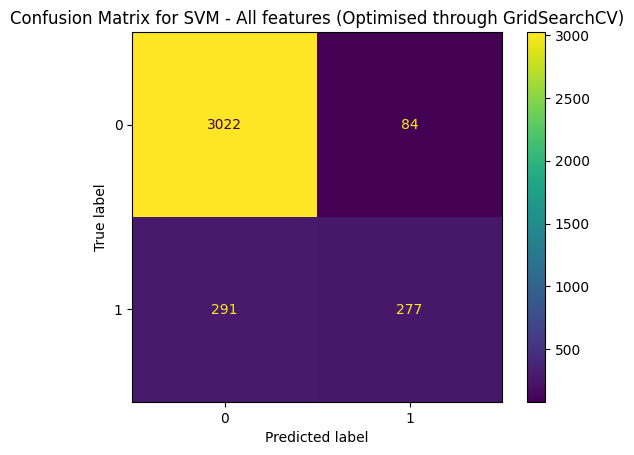

In [ ]:
##Generating Confusion Matrix for SVM - base model with all features
y1_pred=svmodel.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y1_pred)
plt.title("Confusion Matrix for SVM - All features (Optimised through GridSearchCV)")
plt.show()

In [ ]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3106
           1       0.77      0.49      0.60       568

    accuracy                           0.90      3674
   macro avg       0.84      0.73      0.77      3674
weighted avg       0.89      0.90      0.89      3674



While SVM works a bit better than logistic regression, the recall is still very low.

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3106
           1       0.80      0.36      0.49       568

    accuracy                           0.89      3674
   macro avg       0.85      0.67      0.71      3674
weighted avg       0.88      0.89      0.87      3674



Logistic Regression Model with 5 features selected appear to have improved a bit, but not by much.

## Performing Feature Selection

In [ ]:
##Forward Feature selection using 5 features
lrmodel_ff=LogisticRegression(max_iter=10000)
sfs=SequentialFeatureSelector(lrmodel_ff,n_features_to_select=5,direction="forward")
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X.columns) 
X_selected=sfs.fit(X_train_scaled,y_train)

In [ ]:
##Logistic Regression Model with 5 features
X_train_filtered=X_selected.transform(X_train_scaled)
X_test_filtered=X_selected.transform(X_test_scaled)
lrmodel_ff=LogisticRegression(max_iter=10000)
lrmodel_ff.fit(X_train_filtered,y_train)

LogisticRegression(max_iter=10000)

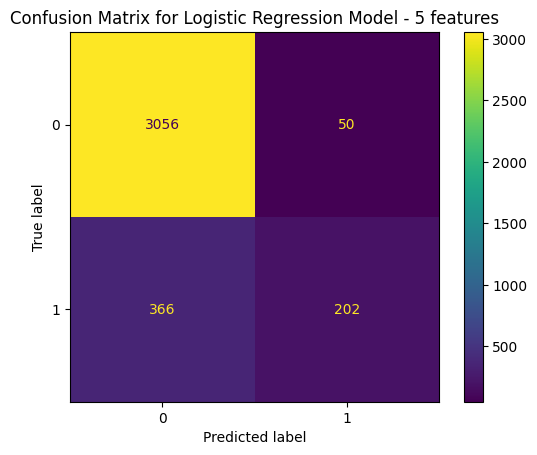

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3106
           1       0.80      0.36      0.49       568

    accuracy                           0.89      3674
   macro avg       0.85      0.67      0.71      3674
weighted avg       0.88      0.89      0.87      3674



In [ ]:
##Confusion Matrix for Logistic Regression Model with 5 features
y2_pred=lrmodel_ff.predict(X_test_filtered)
ConfusionMatrixDisplay.from_predictions(y_test,y2_pred)
plt.title("Confusion Matrix for Logistic Regression Model - 5 features")
plt.show()
print(classification_report(y_test,y2_pred))

In [ ]:
##Forward Feature Selection - SVM using 5 features
svmodel_ff=svm.SVC(C=1,kernel="rbf")
sfs1=SequentialFeatureSelector(svmodel_ff,n_features_to_select=5,direction="forward")
X1_selected=sfs1.fit(X_train_scaled,y_train)

In [ ]:
X1_train_filtered=X1_selected.transform(X_train_scaled)
X1_test_filtered=X1_selected.transform(X_test_scaled)

In [ ]:
X1_selected.get_feature_names_out()

array(['Administrative', 'ProductRelated', 'ExitRates', 'PageValues',
       'Month'], dtype=object)

Forward Feature Selection for SVM has selected administrative, product related, exit rates, page values and month as the 5 main features.

In [ ]:
svmodel_ff.fit(X1_train_filtered,y_train)

SVC(C=1)

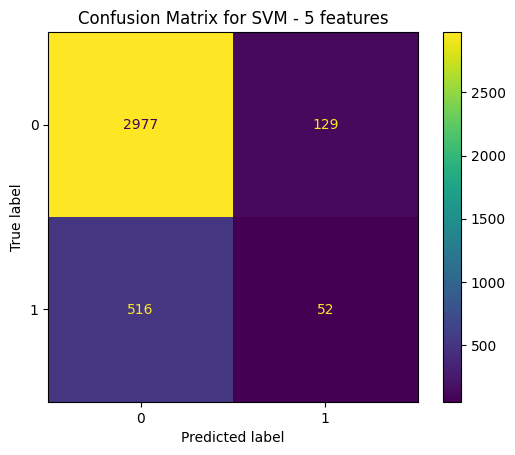

In [ ]:
y3_pred=lrmodel_ff.predict(X1_test_filtered)
ConfusionMatrixDisplay.from_predictions(y_test,y3_pred)
plt.title("Confusion Matrix for SVM - 5 features")
plt.show()

In [ ]:
print(classification_report(y_test,y3_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3106
           1       0.29      0.09      0.14       568

    accuracy                           0.82      3674
   macro avg       0.57      0.53      0.52      3674
weighted avg       0.76      0.82      0.78      3674



## PCA - Principal Component Analysis

In [ ]:
##PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X_train_pca=pca.fit(X_train_scaled)
X_train_full=X_train_pca.transform(X_train_scaled)
X_test_full=X_train_pca.transform(X_test_scaled)

In [ ]:
print(pca.explained_variance_ratio_)
np.sum(pca.explained_variance_ratio_[0:10])

[0.20307492 0.10661783 0.07361083 0.06838953 0.06498171 0.06104858
 0.05975434 0.05769496 0.05492627 0.05433454]


0.8044335098978932

As 10 PCAs explain about 80% of the variance, we will take 10 PCs as the new feature into running all our models.

In [ ]:
#Logistic Regression with 10 PCs
lrmodel_pca=LogisticRegression(max_iter=10000)
lrmodel_pca.fit(X_train_full,y_train)

LogisticRegression(max_iter=10000)

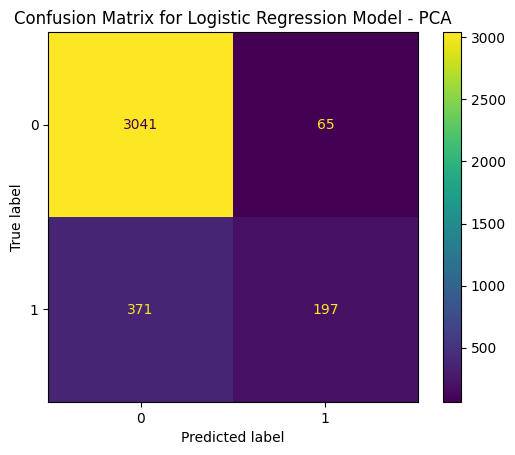

In [ ]:
y_pred_pca=lrmodel_pca.predict(X_test_full)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_pca)
plt.title("Confusion Matrix for Logistic Regression Model - PCA")
plt.show()


In [ ]:
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3106
           1       0.75      0.35      0.47       568

    accuracy                           0.88      3674
   macro avg       0.82      0.66      0.70      3674
weighted avg       0.87      0.88      0.86      3674



In [ ]:
#SVM with 10 PCs
svmodel_pca=svm.SVC(C=1,kernel="rbf",probability=True)
svmodel_pca.fit(X_train_full,y_train)

SVC(C=1, probability=True)

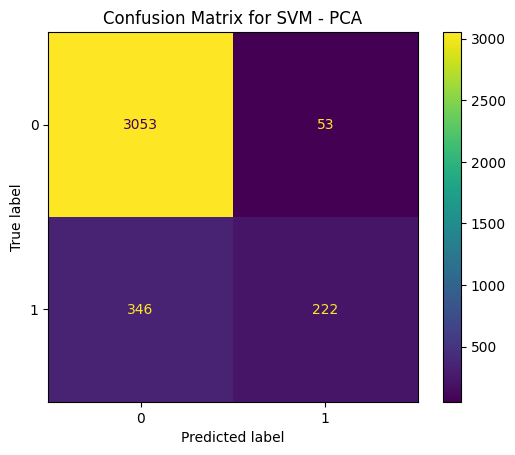

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3106
           1       0.81      0.39      0.53       568

    accuracy                           0.89      3674
   macro avg       0.85      0.69      0.73      3674
weighted avg       0.88      0.89      0.87      3674



In [ ]:
y1_pred_pca=svmodel_pca.predict(X_test_full)
ConfusionMatrixDisplay.from_predictions(y_test,y1_pred_pca)
plt.title("Confusion Matrix for SVM - PCA")
plt.show()
print(classification_report(y_test,y1_pred_pca))

## KNN - K-Nearest Neighbour

In [ ]:
## KNN with all features

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

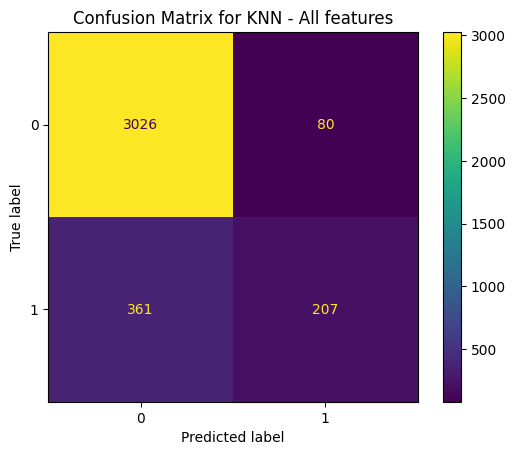

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3106
           1       0.72      0.36      0.48       568

    accuracy                           0.88      3674
   macro avg       0.81      0.67      0.71      3674
weighted avg       0.87      0.88      0.86      3674



In [ ]:
y_pred_knn=knn.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)
plt.title("Confusion Matrix for KNN - All features")
plt.show()
print(classification_report(y_test,y_pred_knn))

In [ ]:
#KNN with Forward Feature Selection
knn_ff=KNeighborsClassifier(n_neighbors=7)
sfs1=SequentialFeatureSelector(knn_ff,n_features_to_select=5,direction="forward")
X2_selected=sfs1.fit(X_train_scaled,y_train)
X2_train_filtered=X2_selected.transform(X_train_scaled)
X2_test_filtered=X2_selected.transform(X_test_scaled)

In [ ]:
X2_selected.get_feature_names_out()

array(['BounceRates', 'ExitRates', 'PageValues', 'Month', 'Browser'],
      dtype=object)

Forward Feature Selection for KNN has chosen Bounce Rates, Exit Rates, Page Values, Month and Browser as the 5 key features.

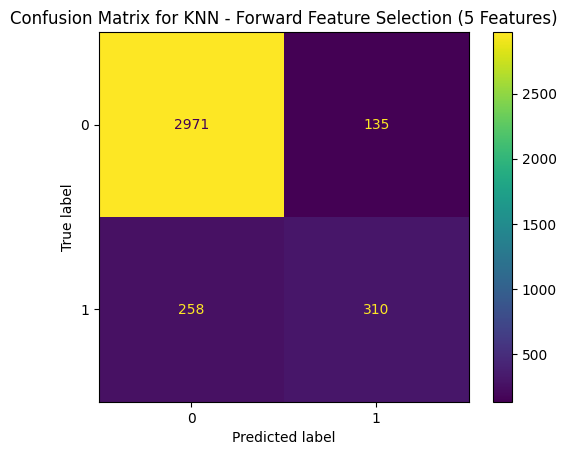

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3106
           1       0.70      0.55      0.61       568

    accuracy                           0.89      3674
   macro avg       0.81      0.75      0.78      3674
weighted avg       0.89      0.89      0.89      3674



In [ ]:
knn_ff.fit(X2_train_filtered,y_train)
y_pred_knn=knn_ff.predict(X2_test_filtered)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)
plt.title("Confusion Matrix for KNN - Forward Feature Selection (5 Features)")
plt.show()
print(classification_report(y_test,y_pred_knn))

In [ ]:
##KNN with optimised metrics
knn_optimised=KNeighborsClassifier(n_neighbors=25,metric="manhattan",weights="uniform")
sfs_optimised=SequentialFeatureSelector(knn_optimised,n_features_to_select=5,direction="forward")
X_optimised=sfs_optimised.fit(X_train_scaled,y_train)
X_train_optimised=X_optimised.transform(X_train_scaled)
X_test_optimised=X_optimised.transform(X_test_scaled)

In [ ]:
cross_val_score(knn_optimised,X_train_optimised,y_train)

array([0.89329446, 0.89323221, 0.90665111, 0.89148191, 0.89848308])

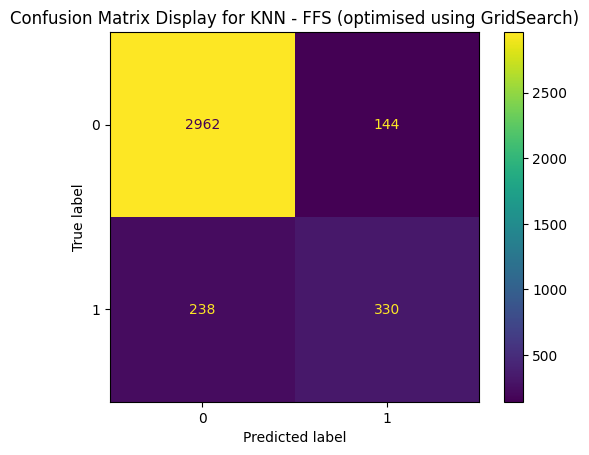

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3106
           1       0.70      0.58      0.63       568

    accuracy                           0.90      3674
   macro avg       0.81      0.77      0.79      3674
weighted avg       0.89      0.90      0.89      3674



In [ ]:
knn_optimised.fit(X_train_optimised,y_train)
y_pred_optimised=knn_optimised.predict(X_test_optimised)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_optimised)
plt.title("Confusion Matrix Display for KNN - FFS (optimised using GridSearch)")
plt.show()
print(classification_report(y_test,y_pred_optimised))

In [ ]:
#KNN - SMOTE + Forward Feature selection
knn_optimised_smote=KNeighborsClassifier(n_neighbors=25,metric="manhattan",weights="uniform")
sfs_optimised_smote=SequentialFeatureSelector(knn_optimised_smote,n_features_to_select=5,direction="forward")
X_optimised_smote=sfs_optimised_smote.fit(X_train_SMOTE,y_train_SMOTE)
X_train_optimised_smote=X_optimised_smote.transform(X_train_SMOTE)
X_test_optimised_smote=X_optimised_smote.transform(X_test_scaled)
knn_optimised_smote.fit(X_train_optimised_smote,y_train_SMOTE)
y_pred_optimised_smote=knn_optimised.predict(X_test_optimised_smote)

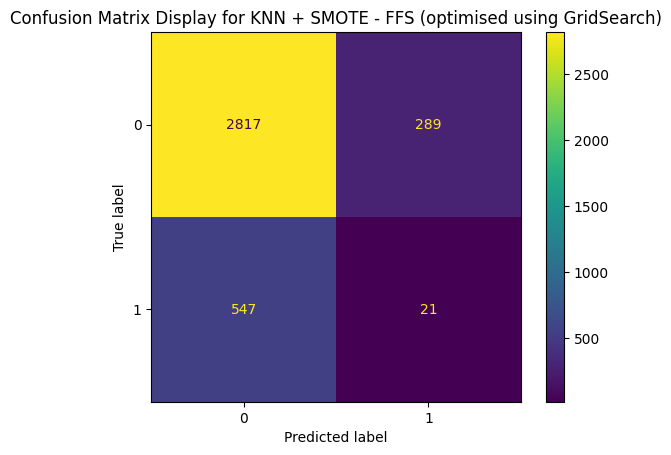

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3106
           1       0.07      0.04      0.05       568

    accuracy                           0.77      3674
   macro avg       0.45      0.47      0.46      3674
weighted avg       0.72      0.77      0.74      3674



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_optimised_smote)
plt.title("Confusion Matrix Display for KNN + SMOTE - FFS (optimised using GridSearch)")
plt.show()
print(classification_report(y_test,y_pred_optimised_smote))

In [ ]:
#KNN with PCA - 10 PCs
knn_pca=KNeighborsClassifier(n_neighbors=7)
knn_pca.fit(X_train_full,y_train)

KNeighborsClassifier(n_neighbors=7)

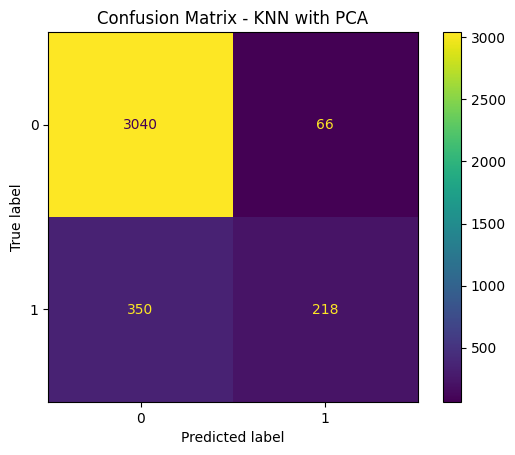

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3106
           1       0.77      0.38      0.51       568

    accuracy                           0.89      3674
   macro avg       0.83      0.68      0.72      3674
weighted avg       0.88      0.89      0.87      3674



In [ ]:
y2_pred_pca=knn_pca.predict(X_test_full)
ConfusionMatrixDisplay.from_predictions(y_test,y2_pred_pca)
plt.title("Confusion Matrix - KNN with PCA")
plt.show()
print(classification_report(y_test,y2_pred_pca))

## Random Forest 

In [ ]:
##Trying Random Forest algorithm
rfmodel=RandomForestClassifier()
rfmodel.fit(X_train_scaled,y_train)

RandomForestClassifier()

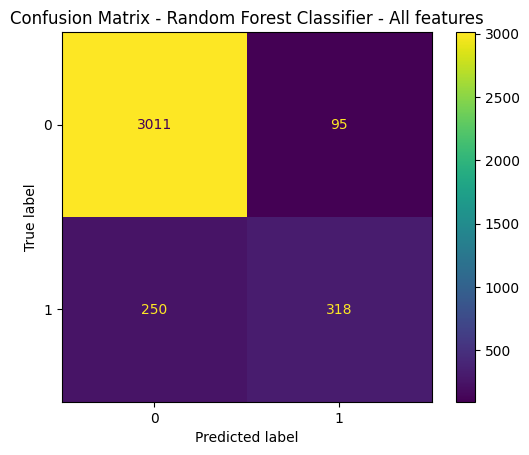

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3106
           1       0.77      0.56      0.65       568

    accuracy                           0.91      3674
   macro avg       0.85      0.76      0.80      3674
weighted avg       0.90      0.91      0.90      3674



In [ ]:
y_pred_rf=rfmodel.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title("Confusion Matrix - Random Forest Classifier - All features")
plt.show()
print(classification_report(y_test,y_pred_rf))

In [ ]:
#Trying Random Forest with PCA
rfmodel_pca=RandomForestClassifier()
rfmodel.fit(X_train_full,y_train)

RandomForestClassifier()

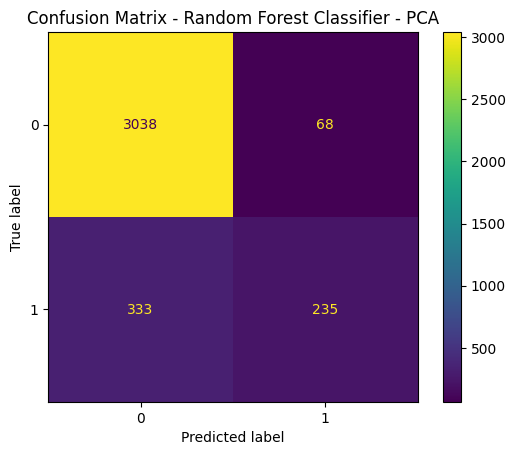

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3106
           1       0.78      0.41      0.54       568

    accuracy                           0.89      3674
   macro avg       0.84      0.70      0.74      3674
weighted avg       0.88      0.89      0.88      3674



In [ ]:
y1_pred_rf=rfmodel.predict(X_test_full)
ConfusionMatrixDisplay.from_predictions(y_test,y1_pred_rf)
plt.title("Confusion Matrix - Random Forest Classifier - PCA")
plt.show()
print(classification_report(y_test,y1_pred_rf))

In [ ]:
#Trying Random Forest with FFS
rfmodel_ff=RandomForestClassifier()
sfs_rf=SequentialFeatureSelector(rfmodel_ff,n_features_to_select=5,direction="forward")
X_ffselected=sfs_rf.fit(X_train_scaled,y_train)
X_train_filteredff=X_ffselected.transform(X_train_scaled)
X_test_filteredff=X_ffselected.transform(X_test_scaled)


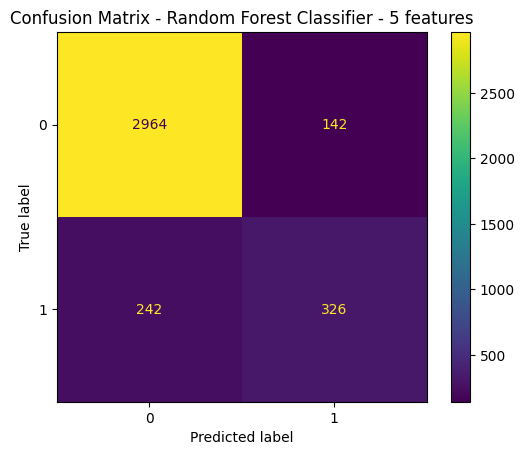

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3106
           1       0.70      0.57      0.63       568

    accuracy                           0.90      3674
   macro avg       0.81      0.76      0.78      3674
weighted avg       0.89      0.90      0.89      3674



In [ ]:
rfmodel_ff.fit(X_train_filteredff,y_train)
y2_pred_rf=rfmodel_ff.predict(X_test_filteredff)
ConfusionMatrixDisplay.from_predictions(y_test,y2_pred_rf)
plt.title("Confusion Matrix - Random Forest Classifier - 5 features")
plt.show()
print(classification_report(y_test,y2_pred_rf))

In [ ]:
##Trying BalancedRandomForestClassifier
brfmodel=BalancedRandomForestClassifier()
brfmodel.fit(X_train_scaled,y_train)

BalancedRandomForestClassifier()

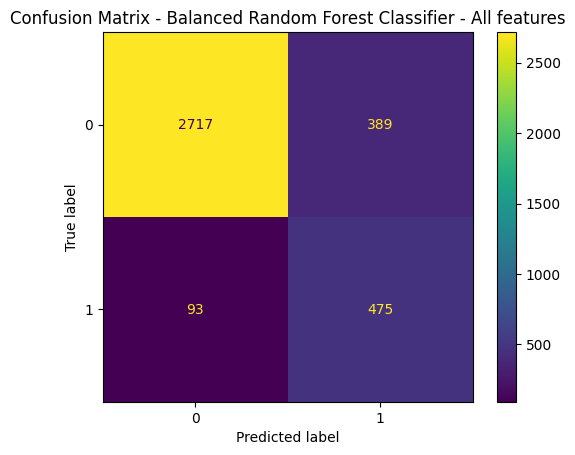

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3106
           1       0.55      0.84      0.66       568

    accuracy                           0.87      3674
   macro avg       0.76      0.86      0.79      3674
weighted avg       0.90      0.87      0.88      3674



In [ ]:
y_pred_brf=brfmodel.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_brf)
plt.title("Confusion Matrix - Balanced Random Forest Classifier - All features")
plt.show()
print(classification_report(y_test,y_pred_brf))

In [ ]:
brfmodel_ff=BalancedRandomForestClassifier()
sfs_rf=SequentialFeatureSelector(brfmodel_ff,n_features_to_select=5,direction="forward")
X_ffselected=sfs_rf.fit(X_train_scaled,y_train)
X_train_filteredff=X_ffselected.transform(X_train_scaled)
X_test_filteredff=X_ffselected.transform(X_test_scaled)


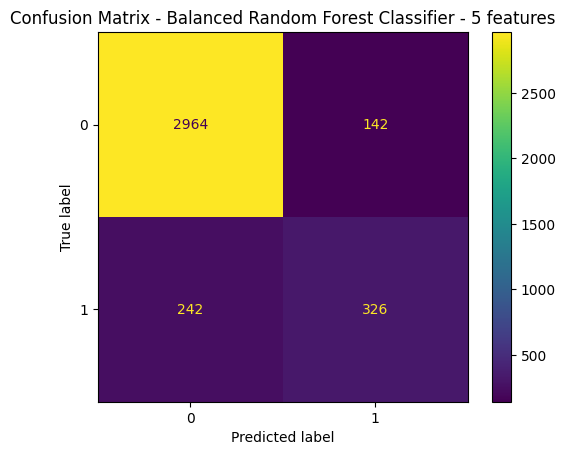

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3106
           1       0.59      0.77      0.67       568

    accuracy                           0.88      3674
   macro avg       0.77      0.84      0.80      3674
weighted avg       0.90      0.88      0.89      3674



In [ ]:
brfmodel_ff.fit(X_train_filteredff,y_train) 
y2_pred_brf=brfmodel_ff.predict(X_test_filteredff)
ConfusionMatrixDisplay.from_predictions(y_test,y2_pred_rf)
plt.title("Confusion Matrix - Balanced Random Forest Classifier - 5 features")
plt.show()
print(classification_report(y_test,y2_pred_brf))

In [ ]:
##Balanced Random Forest Classifier - PCA
brfmodel_pca=BalancedRandomForestClassifier()
brfmodel_pca.fit(X_train_full,y_train)


BalancedRandomForestClassifier()

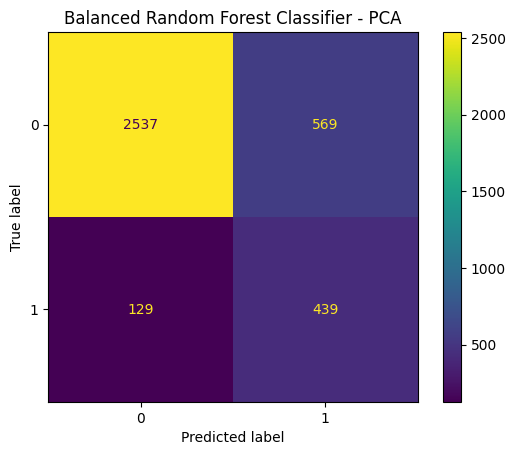

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3106
           1       0.44      0.77      0.56       568

    accuracy                           0.81      3674
   macro avg       0.69      0.79      0.72      3674
weighted avg       0.87      0.81      0.83      3674



In [ ]:
y1_pred_brf=brfmodel_pca.predict(X_test_full)
ConfusionMatrixDisplay.from_predictions(y_test,y1_pred_brf)
plt.title("Balanced Random Forest Classifier - PCA")
plt.show()
print(classification_report(y_test,y1_pred_brf))

In [ ]:
rfmodel_smote=RandomForestClassifier(random_state=1)
rfmodel_smote.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(random_state=1)

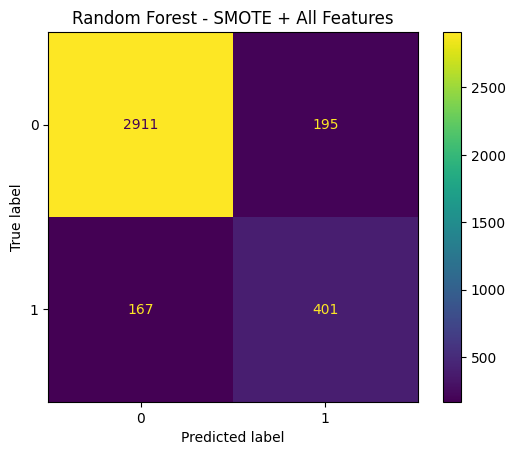

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3106
           1       0.67      0.71      0.69       568

    accuracy                           0.90      3674
   macro avg       0.81      0.82      0.82      3674
weighted avg       0.90      0.90      0.90      3674



In [ ]:
y_pred_SMOTE=rfmodel_smote.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_SMOTE)
plt.title("Random Forest - SMOTE + All Features")
plt.show()
print(classification_report(y_test,y_pred_SMOTE))

In [ ]:
cross_val_score(rfmodel_smote,X_test_scaled,y_test)

array([0.91020408, 0.90204082, 0.87346939, 0.90204082, 0.90871935])

<BarContainer object of 17 artists>

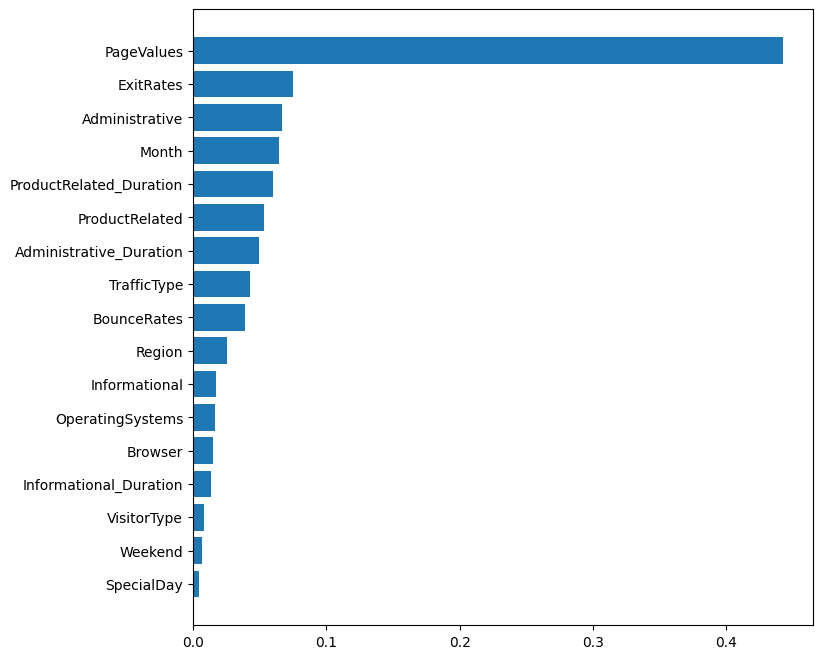

In [ ]:
##Random Forest feature importance
plt.figure(figsize=(8,8))
graph=rfmodel_smote.feature_importances_
sorted_idx=graph.argsort()
plt.barh(X.columns[sorted_idx],rfmodel_smote.feature_importances_[sorted_idx])

In [ ]:
#SMOTE with Random Forest - FFS
rfmodel_smote_ff=RandomForestClassifier()
sfs_smote=SequentialFeatureSelector(rfmodel_smote_ff,n_features_to_select=5,direction="forward")
X_smoteselected=sfs_smote.fit(X_train_SMOTE,y_train_SMOTE)
X_train_SMOTEfinal=X_smoteselected.transform(X_train_SMOTE)
X_test_SMOTEfinal=X_smoteselected.transform(X_test_scaled)

In [ ]:
rfmodel_smote_ff.fit(X_train_SMOTEfinal,y_train_SMOTE)

RandomForestClassifier()

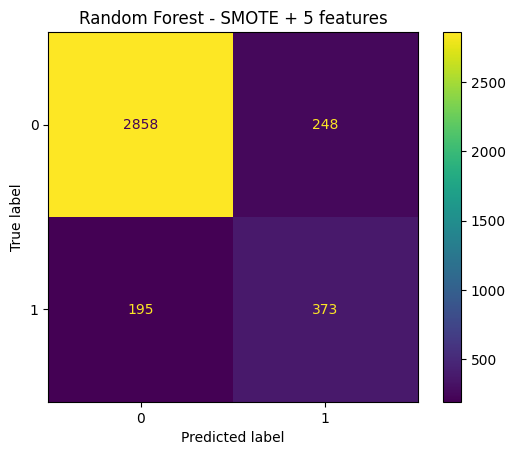

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3106
           1       0.60      0.66      0.63       568

    accuracy                           0.88      3674
   macro avg       0.77      0.79      0.78      3674
weighted avg       0.88      0.88      0.88      3674



In [ ]:
y_pred_smoteffs=rfmodel_smote_ff.predict(X_test_SMOTEfinal)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_smoteffs)
plt.title("Random Forest - SMOTE + 5 features")
plt.show()
print(classification_report(y_test,y_pred_smoteffs))

In [ ]:
#SMOTE with RandomForest - PCA
sm_sample1=SMOTE(random_state=1)
X1_train_SMOTE,y1_train_SMOTE=sm_sample.fit_resample(X_train_full,y_train)

In [ ]:
rfmodel_smotePCA=RandomForestClassifier()
rfmodel_smotePCA.fit(X1_train_SMOTE,y1_train_SMOTE)

RandomForestClassifier()

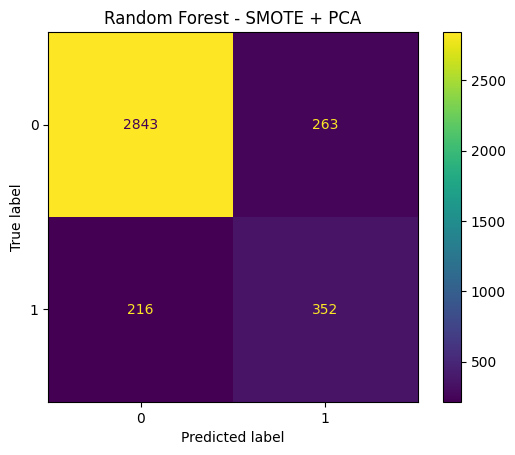

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3106
           1       0.57      0.62      0.60       568

    accuracy                           0.87      3674
   macro avg       0.75      0.77      0.76      3674
weighted avg       0.87      0.87      0.87      3674



In [ ]:
y_pred_smotePCA=rfmodel_smotePCA.predict(X_test_full)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_smotePCA)
plt.title("Random Forest - SMOTE + PCA")
plt.show()
print(classification_report(y_test,y_pred_smotePCA))

In [ ]:
##BaggingClassifier - Decision Tree base
baggingmodel=BaggingClassifier(n_estimators=100)
baggingmodel.fit(X_train_scaled,y_train)

BaggingClassifier(n_estimators=100)

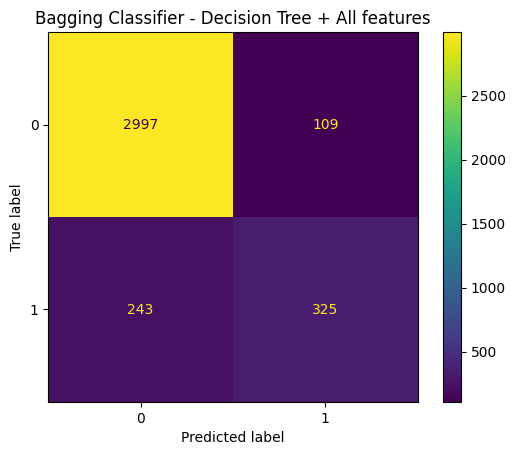

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3106
           1       0.75      0.57      0.65       568

    accuracy                           0.90      3674
   macro avg       0.84      0.77      0.80      3674
weighted avg       0.90      0.90      0.90      3674



In [ ]:
y_pred_bag=baggingmodel.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_bag)
plt.title("Bagging Classifier - Decision Tree + All features")
plt.show()
print(classification_report(y_test,y_pred_bag))

In [ ]:
#Bagging Classifier - SMOTE + All features
baggingmodel_smote=BaggingClassifier(n_estimators=100)
baggingmodel_smote.fit(X_train_SMOTE,y_train_SMOTE)

BaggingClassifier(n_estimators=100)

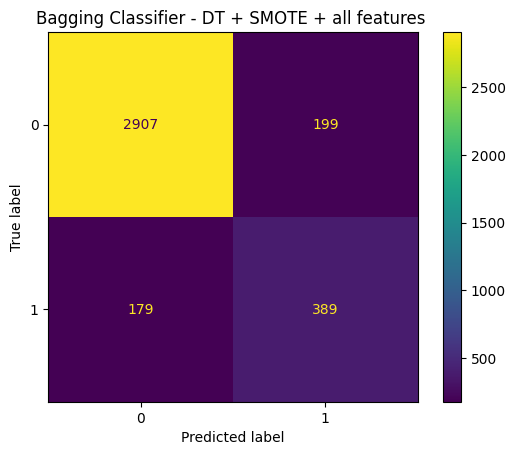

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3106
           1       0.66      0.68      0.67       568

    accuracy                           0.90      3674
   macro avg       0.80      0.81      0.81      3674
weighted avg       0.90      0.90      0.90      3674



In [ ]:
y_pred_bagsmote=baggingmodel_smote.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_bagsmote)
plt.title("Bagging Classifier - DT + SMOTE + all features ")
plt.show()
print(classification_report(y_test,y_pred_bagsmote))

In [ ]:
##Bagging Classifier - SVM
base_model=svm.SVC(probability=True)
baggingmodel_svm=BaggingClassifier(estimator=base_model,n_estimators=100)
baggingmodel_svm.fit(X_train_scaled,y_train)

BaggingClassifier(estimator=SVC(probability=True), n_estimators=100)

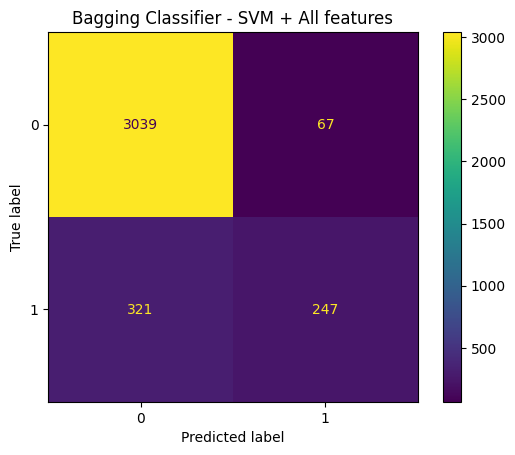

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3106
           1       0.79      0.43      0.56       568

    accuracy                           0.89      3674
   macro avg       0.85      0.71      0.75      3674
weighted avg       0.89      0.89      0.88      3674



In [ ]:
y_pred_svmbag=baggingmodel_svm.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svmbag)
plt.title("Bagging Classifier - SVM + All features")
plt.show()
print(classification_report(y_test,y_pred_svmbag))

In [ ]:
#Bagging Classifier - Logistic Regression + All features
base_lrmodel=LogisticRegression(max_iter=10000)
lr_bagmodel=BaggingClassifier(estimator=base_lrmodel,n_estimators=100)
lr_bagmodel.fit(X_train_scaled,y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=10000),
                  n_estimators=100)

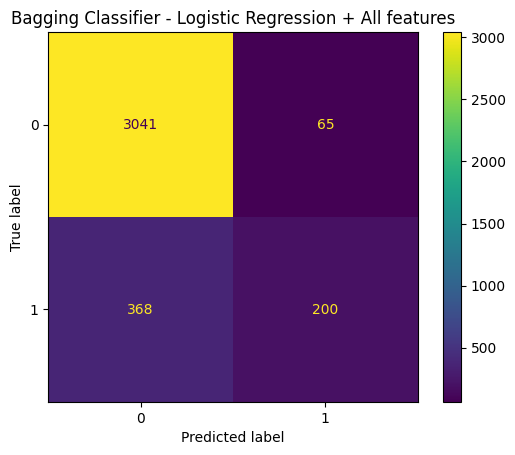

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3106
           1       0.75      0.35      0.48       568

    accuracy                           0.88      3674
   macro avg       0.82      0.67      0.71      3674
weighted avg       0.87      0.88      0.86      3674



In [ ]:
y_pred_lrbag=lr_bagmodel.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lrbag)
plt.title("Bagging Classifier - Logistic Regression + All features")
plt.show()
print(classification_report(y_test,y_pred_lrbag))

## Naive Bayes

In [ ]:
# train model
# create a Gaussian classifier
model_nb = GaussianNB()

# train models with training data
model_nb.fit(X_train, y_train)

# response prediction for test data
y_pred_nb = model_nb.predict(X_test)


In [ ]:
# check for overfitting and underfitting
print('Training set score: {:.4f}'.format(model_nb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_nb.score(X_test, y_test)))

Training set score: 0.8441
Test set score: 0.8449


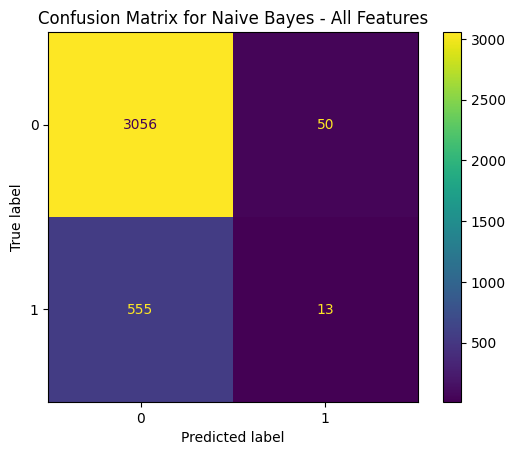

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3106
           1       0.21      0.02      0.04       568

    accuracy                           0.84      3674
   macro avg       0.53      0.50      0.48      3674
weighted avg       0.75      0.84      0.78      3674



In [ ]:
# Confusion Matrix for Naive Bayes - All features
y_pred_nb=model_nb.predict(X_test_scaled)
fig_nb = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
plt.title("Confusion Matrix for Naive Bayes - All Features")
plt.show()
print(classification_report(y_test,y_pred_nb))

# Final Selection of Model

In [ ]:
metrics_df=pd.DataFrame(columns=["Model","Accuracy","Precision","Recall","F1-score"])

In [ ]:
metrics_df.loc[len(metrics_df)]={"Model":"Logistic Regression - FFS","Accuracy":metrics.accuracy_score(y_test,y2_pred),"Precision":metrics.precision_score(y_test,y2_pred),"Recall":metrics.recall_score(y_test,y2_pred),"F1-score":metrics.f1_score(y_test,y2_pred)}

In [ ]:
metrics_df.loc[len(metrics_df)]={"Model":"SVM - All features","Accuracy":metrics.accuracy_score(y_test,y1_pred),"Precision":metrics.precision_score(y_test,y1_pred),"Recall":metrics.recall_score(y_test,y1_pred),"F1-score":metrics.f1_score(y_test,y1_pred)}

In [ ]:
metrics_df.loc[len(metrics_df)]={"Model":"K-Nearest Neighbours - FFS","Accuracy":metrics.accuracy_score(y_test,y_pred_optimised),"Precision":metrics.precision_score(y_test,y_pred_optimised),"Recall":metrics.recall_score(y_test,y_pred_optimised),"F1-score":metrics.f1_score(y_test,y_pred_optimised)}

In [ ]:
metrics_df.loc[len(metrics_df)]={"Model":"Random Forest - All features","Accuracy":metrics.accuracy_score(y_test,y_pred_SMOTE),"Precision":metrics.precision_score(y_test,y_pred_SMOTE),"Recall":metrics.recall_score(y_test,y_pred_SMOTE),"F1-score":metrics.f1_score(y_test,y_pred_SMOTE)}

In [ ]:
metrics_df.loc[len(metrics_df)]={"Model":"Bagging Classifier - All features","Accuracy":metrics.accuracy_score(y_test,y_pred_bagsmote),"Precision":metrics.precision_score(y_test,y_pred_bagsmote),"Recall":metrics.recall_score(y_test,y_pred_bagsmote),"F1-score":metrics.f1_score(y_test,y_pred_bagsmote)}

In [ ]:
metrics_df.loc[len(metrics_df)]={"Model":"Balanced Random Forest - All Features","Accuracy":metrics.accuracy_score(y_test,y_pred_brf),"Precision":metrics.precision_score(y_test,y_pred_brf),"Recall":metrics.recall_score(y_test,y_pred_brf),"F1-score":metrics.f1_score(y_test,y_pred_brf)}

In [ ]:
metrics_df.loc[len(metrics_df)]={"Model":"Naive Bayes - All Features","Accuracy":metrics.accuracy_score(y_test,y_pred_nb),"Precision":metrics.precision_score(y_test,y_pred_nb),"Recall":metrics.recall_score(y_test,y_pred_nb),"F1-score":metrics.f1_score(y_test,y_pred_nb)}

In [ ]:
metrics_df=metrics_df.sort_values("F1-score",ascending=False)
metrics_df.reset_index(drop=True,inplace=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest - All features,0.901470,0.672819,0.705986,0.689003
1,Bagging Classifier - All features,0.897115,0.661565,0.684859,0.673010
2,Balanced Random Forest - All Features,0.868808,0.549769,0.836268,0.663408
3,K-Nearest Neighbours - FFS,0.896026,0.696203,0.580986,0.633397
4,SVM - All features,0.897931,0.767313,0.487676,0.596340
5,Logistic Regression - FFS,0.886772,0.801587,0.355634,0.492683
6,Naive Bayes - All Features,0.835329,0.206349,0.022887,0.041204


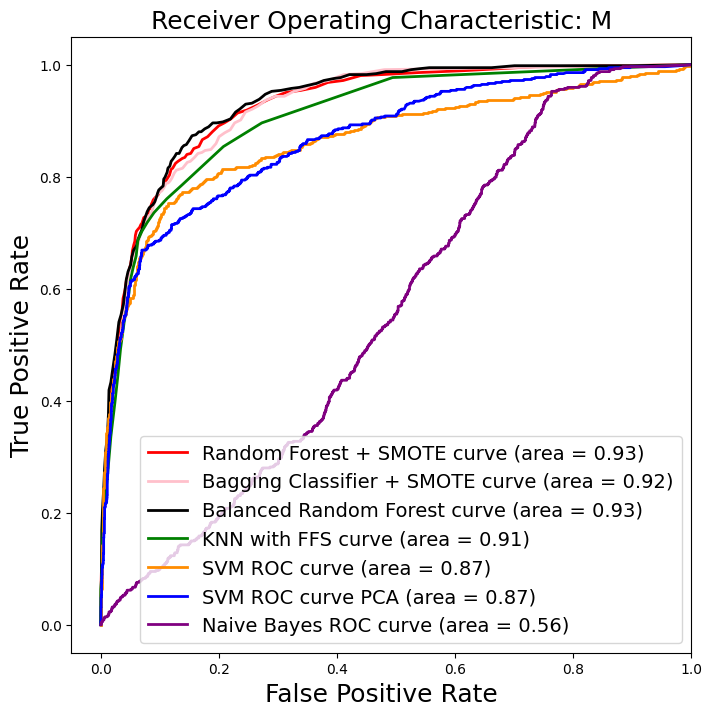

In [ ]:
#Plotting the AUC (Area under the ROC Curve/ROC (Receiver Operating Characteristic) to compare across
rfsmote_preds=rfmodel_smote.predict_proba(X_test_scaled)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,rfsmote_preds)
roc_auc=metrics.auc(fpr,tpr)

bagsmote_preds=baggingmodel_smote.predict_proba(X_test_scaled)[:,1]
fpr2,tpr2,_=metrics.roc_curve(y_test,bagsmote_preds)
roc_auc2=metrics.auc(fpr2,tpr2)

brf_preds = brfmodel.predict_proba(X_test_scaled)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, brf_preds)
roc_auc3 = metrics.auc(fpr3, tpr3)

knn_preds = knn_optimised.predict_proba(X_test_optimised)[:,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test, knn_preds)
roc_auc4 = metrics.auc(fpr4, tpr4)

sv_preds = svmodel.predict_proba(X_test_scaled)[:,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test, sv_preds)
roc_auc5 = metrics.auc(fpr5, tpr5)

lr_preds = lrmodel_ff.predict_proba(X_test_filtered)[:,1]
fpr6, tpr6, _ = metrics.roc_curve(y_test, lr_preds)
roc_auc6 = metrics.auc(fpr6, tpr6)

nb_preds = model_nb.predict_proba(X_test_scaled)[:,1]
fpr7, tpr7, _ = metrics.roc_curve(y_test, nb_preds)
roc_auc7 = metrics.auc(fpr7, tpr7)

plt.figure(figsize=[8,8])
lw=2
plt.plot(fpr, tpr, color='red', lw = lw, label = 'Random Forest + SMOTE curve (area = %0.2f)' % roc_auc)
plt.plot(fpr2,tpr2,color="pink",lw=lw,label='Bagging Classifier + SMOTE curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='black', lw = lw, label = 'Balanced Random Forest curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='green', lw = lw, label = 'KNN with FFS curve (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='darkorange', lw = lw, label = 'SVM ROC curve (area = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='blue', lw = lw, label = 'SVM ROC curve PCA (area = %0.2f)' % roc_auc6)
plt.plot(fpr7, tpr7, color='purple', lw = lw, label = 'Naive Bayes ROC curve (area = %0.2f)' % roc_auc7)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right",fontsize=14)
plt.show()

Final Selection of Model: Random Forest Classifier utilising all features, as it gives the highest F1-score of about 0.69 and the highest accuracy, and ROC compared to other models.